<div style="padding:0px 40px 20px; 
            color:#201E20;
            font-size:20px;
            display:fill;
            text-align:center;
            border-radius:20px;
            border: 5px double;
            border-color:#201E20;
            background-color: #FEB139;
            overflow:hidden;
            font-weight:400"> 

# Анализ бизнес-показателей развлекательного приложения Procrastinate Pro+

</div>



<div style="padding:0px 40px 30px; 
            color:#201E20;
            font-size:110%;
            display:fill;
            border-radius:20px;
            border: 5px double;
            border-color:#201E20;
            background-color: #F6E7D8;
            overflow:hidden;
            font-weight:450;"> 
<br>
<h1 style = "text-align:center;font-size:20px;">Оглавление:</h1>  

    
1. Предобработка данных

    
2. Зададём функции для расчёта и анализа LTV, ROI, удержания и конверсии.

    
3. Исследовательский анализ данных


4. Маркетинг

    
5. Оцениваем окупаемость рекламы

    
6. Общий вывод
 
<h1 style = "text-align:center;font-size:20px;">Цель данного проекта изучить:</h1>  

    
- откуда приходят пользователи и какими устройствами они пользуются,
    
- сколько стоит привлечение пользователей из различных рекламных каналов;
    
- сколько денег приносит каждый клиент,
    
- когда расходы на привлечение клиента окупаются,
    
- какие факторы мешают привлечению клиентов.



В нашем распоряжении данные о визитах, заказах и рекламных расходах 

**Пути к файлам**

- визиты: `/datasets/visits_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/visits_info_short.csv);
- заказы: `/datasets/orders_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/orders_info_short.csv);
- расходы: `/datasets/costs_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/costs_info_short.csv).

Структура visits_info_short.csv:
- User Id — уникальный идентификатор пользователя,
- Region — страна пользователя,
- Device — тип устройства пользователя,
- Channel — идентификатор источника перехода,
- Session Start — дата и время начала сессии,
- Session End — дата и время окончания сессии.

Структура orders_info_short.csv:
- User Id — уникальный идентификатор пользователя,
- Event Dt — дата и время покупки,
- Revenue — сумма заказа.

Структура costs_info_short.csv:
- dt — дата проведения рекламной кампании,
- Channel — идентификатор рекламного источника,
- costs — расходы на эту кампанию.




</div>

<div style="padding:0px 40px 30px; 
            color:#201E20;
            font-size:110%;
            display:fill;
            border-radius:20px;
            border: 5px double;
            border-color:#201E20;
            background-color: #F6E7D8;
            overflow:hidden;
            font-weight:450;"> 
<h1 style = "text-align:center;font-size:20px;">Результат исследования.</h1>  
<br>
 В процессе исследования данных нам удастся выяснить что финансовые потоки по маркетинговым каналам привлечения клиентов распределены не правильно, и как следствие, бизнес несет слишком сильные затраты на рекламу при минимальной отдаче, нам удастся выявить проблему и дать несколько рекомендаций на этот счет..🚀



</div>



## Предобработка данных

In [1]:
# Импортируем все необходимые библиотеки:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import numpy as np
import seaborn as sns
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Загрузим файлы на gdrive, для удобства работы через Colab..
# Путь к таблицам на gdrive
# https://drive.google.com/file/d/19_JU6_9u-ECkffwCv-Qmy6stwz0jqSIM/view?usp=share_link 
# https://drive.google.com/file/d/1hb8Av4iyaP3itm8nEbclwDzwOqDwIZcF/view?usp=share_link
# https://drive.google.com/file/d/1j4jgW35-_XnTKA67AesdkzJhPs2uiTkf/view?usp=share_link

In [3]:
! gdown 19_JU6_9u-ECkffwCv-Qmy6stwz0jqSIM # 
! gdown 1hb8Av4iyaP3itm8nEbclwDzwOqDwIZcF # 
! gdown 1j4jgW35-_XnTKA67AesdkzJhPs2uiTkf # подгружаем файлы с gdrive

/bin/bash: gdown: command not found
/bin/bash: gdown: command not found
/bin/bash: gdown: command not found


In [4]:
# Сделаем универсальную загрузку чтобы работать через Colab и JupyterNotebook:
try:
    visits, orders, costs = (
        pd.read_csv('/сontent/visits_info_short.csv'),
        pd.read_csv('/content/orders_info_short.csv'),
        pd.read_csv('/content/costs_info_short.csv')
    )
except:
    visits, orders, costs = (
        pd.read_csv('/datasets/visits_info_short.csv'),
        pd.read_csv('/datasets/orders_info_short.csv'),
        pd.read_csv('/datasets/costs_info_short.csv')
    )
display(visits.head(5))
display(orders.head(5))
print(costs.head(5))


,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


           dt   Channel  costs
0  2019-05-01  FaceBoom  113.3
1  2019-05-02  FaceBoom   78.1
2  2019-05-03  FaceBoom   85.8
3  2019-05-04  FaceBoom  136.4
4  2019-05-05  FaceBoom  122.1


In [5]:
# выведем общую информацию по всем датафреймам и посчитаем количество дубликатов
visits.info() 
print(f'Количество дубликатов:{visits.duplicated().sum()}')
print() 
orders.info()
print(f'Количество дубликатов:{orders.duplicated().sum()}')
print() 
costs.info()
print(f'Количество дубликатов:{costs.duplicated().sum()}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB
Количество дубликатов:0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB
Количество дубликатов:0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1

Дубликаты и пропуски не обнаружены, однако столбцы с датой и временем нужно переводить в соответствующий формат во всех таблицах

In [6]:
# приведем наименования столбцов к нижнему регистру и заменим пробелы на _

visits.columns = [name.lower().lower().replace(' ', '_') for name in visits.columns]
orders.columns = [name.lower().replace(' ', '_') for name in orders.columns]
costs.columns = costs.columns.str.lower()


In [7]:
# переведем столбцы с датой и временем в формат datetime

visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
costs['dt'] = pd.to_datetime(costs['dt']).dt.date

In [8]:
# посмотрим что у нас получилось
visits.info() 
print() 
orders.info()
print() 
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        309901 non-null  int64         
 1   region         309901 non-null  object        
 2   device         309901 non-null  object        
 3   channel        309901 non-null  object        
 4   session_start  309901 non-null  datetime64[ns]
 5   session_end    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   40212 non-null  int64         
 1   event_dt  40212 non-null  datetime64[ns]
 2   revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 942

## Зададим функции для расчёта и анализа LTV, ROI, удержания и конверсии.


Функции для вычисления значений метрик:

- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.



In [9]:
# get_profiles() функция для создания пользовательских профилей

def get_profiles(sessions, orders, ad_costs):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

In [10]:
# get_retention() — для подсчёта Retention Rate

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

In [11]:
# get_conversion() — для подсчёта конверсии

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

In [12]:
# get_ltv() — для подсчёта LTV.
def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
  
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

А также функции для построения графиков:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

In [13]:
# filter_data() — для сглаживания данных,

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df


In [14]:
# plot_retention() — для построения графика Retention Rate,

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show()

In [15]:
# plot_conversion() — для построения графика конверсии,

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [		
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

In [16]:
# plot_ltv_roi — для визуализации LTV и ROI.


def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 20))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(3, 2, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(3, 2, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(3, 2, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(3, 2, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(3, 2, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

Все необходимые функции заданы, можем приступать к исследовательскому анализу данных

## Исследовательский анализ данных


In [17]:
profiles = get_profiles(visits, orders, costs) # cоставим профили пользователей, используя функцию get_profiles
profiles.head(10)

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769
5,34186288,2019-05-09 17:29:23,organic,Android,United States,2019-05-09,2019-05-01,False,0.000000
6,38448301,2019-08-16 11:56:00,organic,Android,United States,2019-08-16,2019-08-01,False,0.000000
7,46006712,2019-06-30 03:46:29,AdNonSense,Android,France,2019-06-30,2019-06-01,True,1.008000
8,58263264,2019-05-11 19:18:43,FaceBoom,iPhone,United States,2019-05-11,2019-05-01,False,1.128205
9,59835779,2019-05-11 21:13:47,MediaTornado,iPhone,United States,2019-05-11,2019-05-01,False,0.250435


Согласно заданию у нас есть данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года и пользователи должны окупаться не позднее, чем через две недели после привлечения. 

In [18]:
# Определим минимальную и максимальную даты привлечения пользователей.
observation_date = profiles['dt'].max()  # момент анализа
analysis_horizon = 14  # горизонт анализа
min_analysis_date = profiles['dt'].min() # минимальная дата привлечения
max_analysis_date =  observation_date - timedelta(days=analysis_horizon - 1)  # максимальная дата привлечения

print(f'Минимальная дата привлечения пользователей: {min_analysis_date}')
print(f'Максимальная дата привлечения пользователей: {max_analysis_date}')

Минимальная дата привлечения пользователей: 2019-05-01
Максимальная дата привлечения пользователей: 2019-10-14


payer          not_payer  payer  share
region                                
United States      93100   6902   6.90
UK                 16875    700   3.98
France             16787    663   3.80
Germany            14365    616   4.11



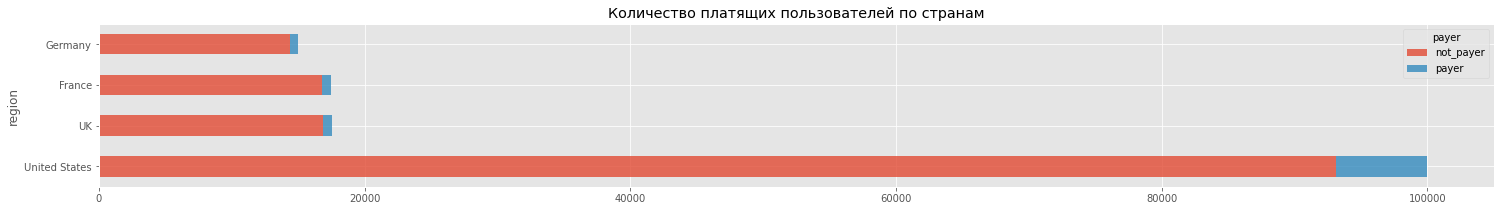

In [19]:
# Выясним, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. 
# Построим таблицу, отражающую количество пользователей и долю платящих из каждой страны.

payers_per_region = (profiles.pivot_table(
            index='region',
            columns='payer',
            values='user_id',
            aggfunc='count')
           .rename(columns={True: 'payer', False: 'not_payer'})
           .sort_values(by='payer', ascending=False)
)

fig, ax = plt.subplots(figsize=(25, 3))
plt.title('Количество платящих пользователей по странам')
payers_per_region.plot(kind="barh",stacked=True, ax=ax, alpha=0.8);
payers_per_region['share'] = (payers_per_region.payer / (payers_per_region.not_payer + payers_per_region.payer) * 100).round(2) # доля платящих пользователей по странам  
print(payers_per_region) 
print()  

По данному графику можно сделать вывод что в основном данным приложением пользуются из США, пользователей из Англии, Франции, Германии в разы меньше, так же в США около 7% пользователей делают покупки в приложении, что заметно больше чем доля оформивших покупки из любой другой страны. Мeньше всего покупают пользователи из Франции, всего 3.8% 

payer    not_payer  payer  share
device                          
iPhone       51097   3382   6.21
Android      32982   2050   5.85
Mac          28130   1912   6.36
PC           28918   1537   5.05



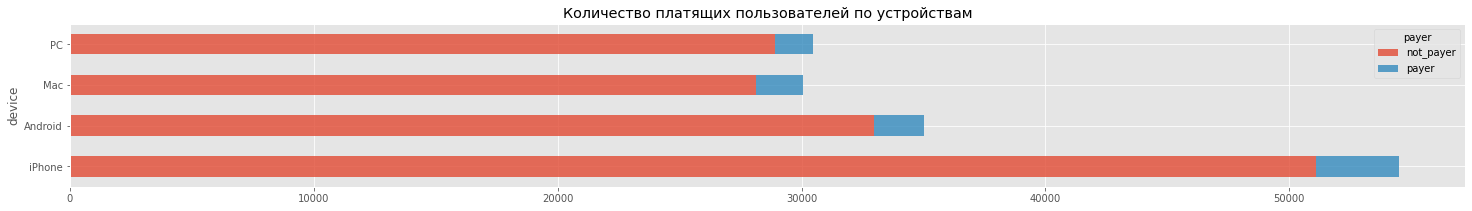

In [20]:
# Узнаем, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. 
# Постройте таблицу, отражающую количество пользователей и долю платящих для каждого устройства.
payers_per_device = (profiles.pivot_table(
            index='device',
            columns='payer',
            values='user_id',
            aggfunc='count')
           .rename(columns={True: 'payer', False: 'not_payer'})
           .sort_values(by='payer', ascending=False)
)
fig, ax = plt.subplots(figsize=(25, 3))
plt.title('Количество платящих пользователей по устройствам')
payers_per_device.plot(kind="barh",stacked=True, ax = ax, alpha=0.8);

payers_per_device['share'] = (payers_per_device.payer / (payers_per_device.not_payer + payers_per_device.payer) * 100).round(2) # доля платящих для каждого устройства 
print(payers_per_device) 
print()

Больше всего пользователей пользуются приложением с iPhone, при этом 6.21% пользователей iPhone совершают покупки в приложении, самая большая доля  покупающих пользователей приходится на пользователей Macbook - 6.36 %


payer               not_payer  payer  share
channel                                    
FaceBoom                25587   3557  12.20
TipTop                  17683   1878   9.60
organic                 55279   1160   2.06
WahooNetBanner           8100    453   5.30
AdNonSense               3440    440  11.34
RocketSuperAds           4096    352   7.91
LeapBob                  8291    262   3.06
OppleCreativeMedia       8372    233   2.71
lambdaMediaAds           1924    225  10.47
YRabbit                  4147    165   3.83
MediaTornado             4208    156   3.57



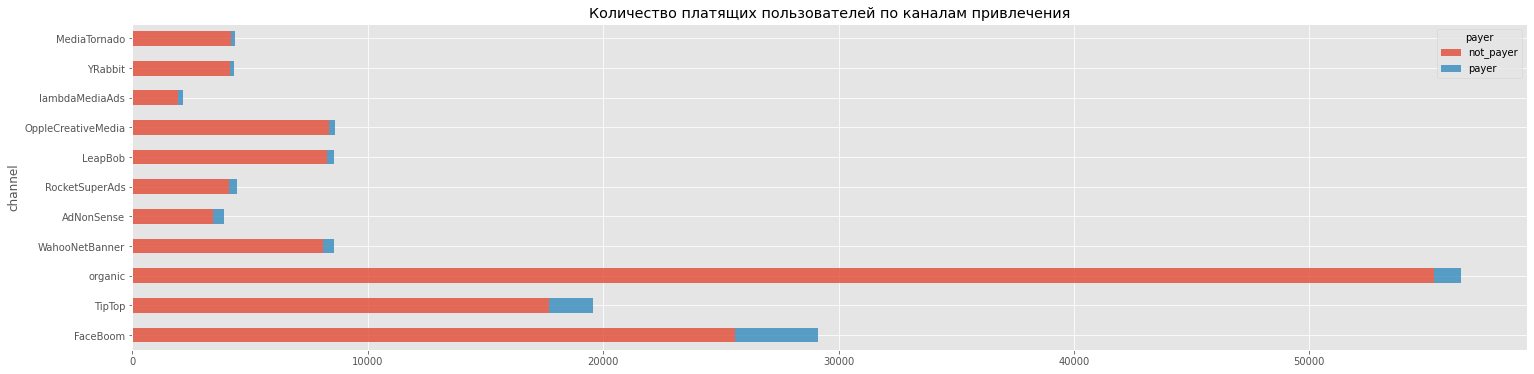

In [21]:
# Изучим рекламные источники привлечения и определим каналы, из которых пришло больше всего платящих пользователей. 
# Построим таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

payers_per_channel = (profiles.pivot_table(
            index='channel',
            columns='payer',
            values='user_id',
            aggfunc='count')
           .rename(columns={True: 'payer', False: 'not_payer'})
           .sort_values(by='payer', ascending=False)
)
fig, ax = plt.subplots(figsize=(25, 6))
plt.title('Количество платящих пользователей по каналам привлечения')
payers_per_channel.plot(kind="barh",stacked=True, ax = ax, alpha=0.8);
payers_per_channel['share'] = (payers_per_channel.payer / (payers_per_channel.not_payer + payers_per_channel.payer) * 100).round(2)
print(payers_per_channel)
print()

Больше всего пользователей приходят естественным путем - 37,6%(канал organic) при этом всего 2.06% делают покупки в приложении. Самая большая доля платящих пользователей приходит с канала FaceBoom - 12.2% и это при внушительном общем количестве пользователей с этого канала, интересно будет узнать сколько нам обходится привлечение данных пользователей. Этим мы займемся далее в проекте..

Вывод: Мы сравнили количество платящих пользователей в разрезе стран, устройств, каналов привлечения и можем сказать что основной рынок данного приложения это США, большое количество пользователей пользуются приложением со смартфонов(iPhone, Android), так же хорошую конверсию имеют пользователи Mac, что говорит нам о популярности приложения у пользователей продукции Apple в целом. Далее так же мы обратим внимание на каналы привлечения FaceBoom и TipTop, которые имеют достаточно неплохую конверсию пользователей в платящих при общем довольно существенном количестве этих пользователей, если затраты на привлечения этих пользователей будут невелики, это станет основным источником дохода приложения..

## Маркетинг


In [22]:
# Посчитаем общую сумму расходов на маркетинг
costs['costs'].sum().round(1)

105497.3

In [23]:
# Выясним, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.

(costs
 .pivot_table(index='channel',values='costs',aggfunc='sum')
 .sort_values(by='costs', ascending=False)
)

,costs
channel,
TipTop,54751.30
FaceBoom,32445.60
WahooNetBanner,5151.00
AdNonSense,3911.25
OppleCreativeMedia,2151.25
RocketSuperAds,1833.00
LeapBob,1797.60
lambdaMediaAds,1557.60
MediaTornado,954.48


Вот они наши основные два канала привлечения пользователей на которые мы ранее обращали внимание(TipTop	и FaceBoom), как видим суммы на рекламу тратятся существенные, однако окупаемость нам все еще не понятна, ее мы рассчитаем далее в проекте..

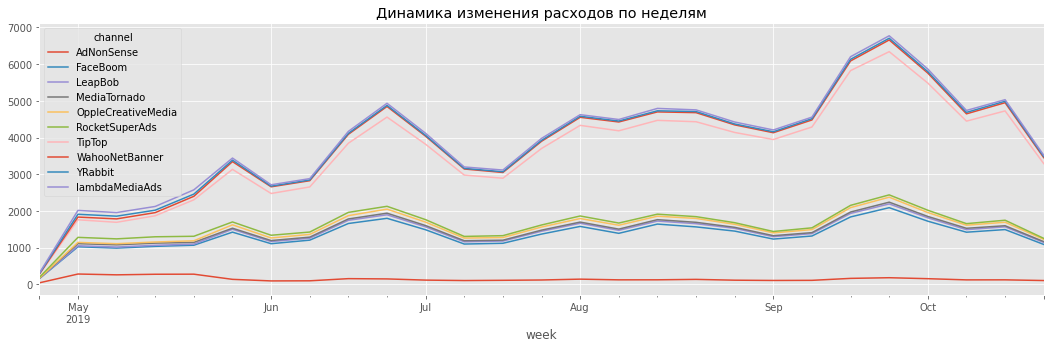

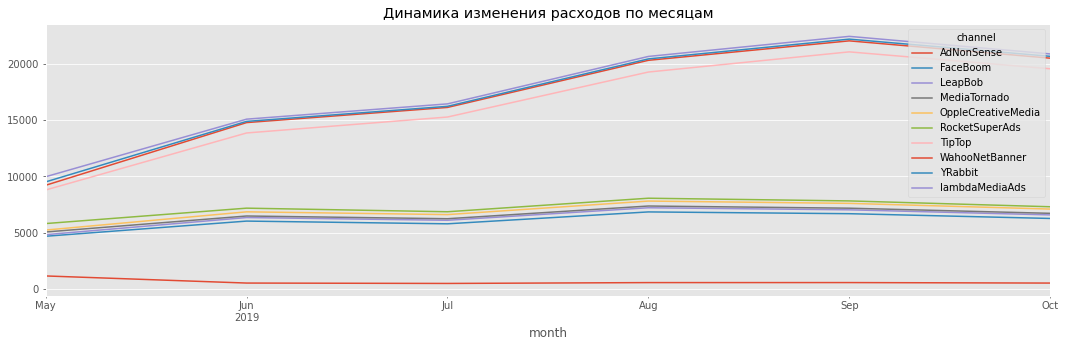

In [24]:
# Построем визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику.

costs['month'] = costs['dt'].astype('datetime64[M]') # выделяем месяц
costs['week'] = costs['dt'].astype('datetime64[W]') # выделяем неделю

# строим график динамики изменения расходов по неделям
fig, ax = plt.subplots(figsize=(18, 5))
plt.title('Динамика изменения расходов по неделям')
(costs
 .pivot_table(
    index='week',
    values='costs',
    aggfunc='sum',
    columns='channel'
)
 .plot(ax=ax, stacked=True)
);
# строим график динамики изменения расходов по месяцам
fig, ax = plt.subplots(figsize=(18, 5))
plt.title('Динамика изменения расходов по месяцам')
(costs
 .pivot_table(
    index='month',
    values='costs',
    aggfunc='sum',
    columns='channel'
)
 .plot(ax=ax, stacked=True)
);

In [25]:
# Узнаем, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. 

(profiles.pivot_table(
            index='channel',
            values='acquisition_cost',
            aggfunc='mean')
           .sort_values(by='acquisition_cost', ascending=False)
)

,acquisition_cost
channel,
TipTop,2.799003
FaceBoom,1.113286
AdNonSense,1.008054
lambdaMediaAds,0.724802
WahooNetBanner,0.602245
RocketSuperAds,0.412095
OppleCreativeMedia,0.250000
YRabbit,0.218975
MediaTornado,0.218717


Вывод: Бюджет распределен так что больше всего средств достается каналам TipTop и FaceBoom при этом дороже всего приложению обходятся пользователи с канала TipTop, FaceBoom и AdNonSence, пользователи с канала organic как и положено достаются бесплатно

## Оценим окупаемость рекламы


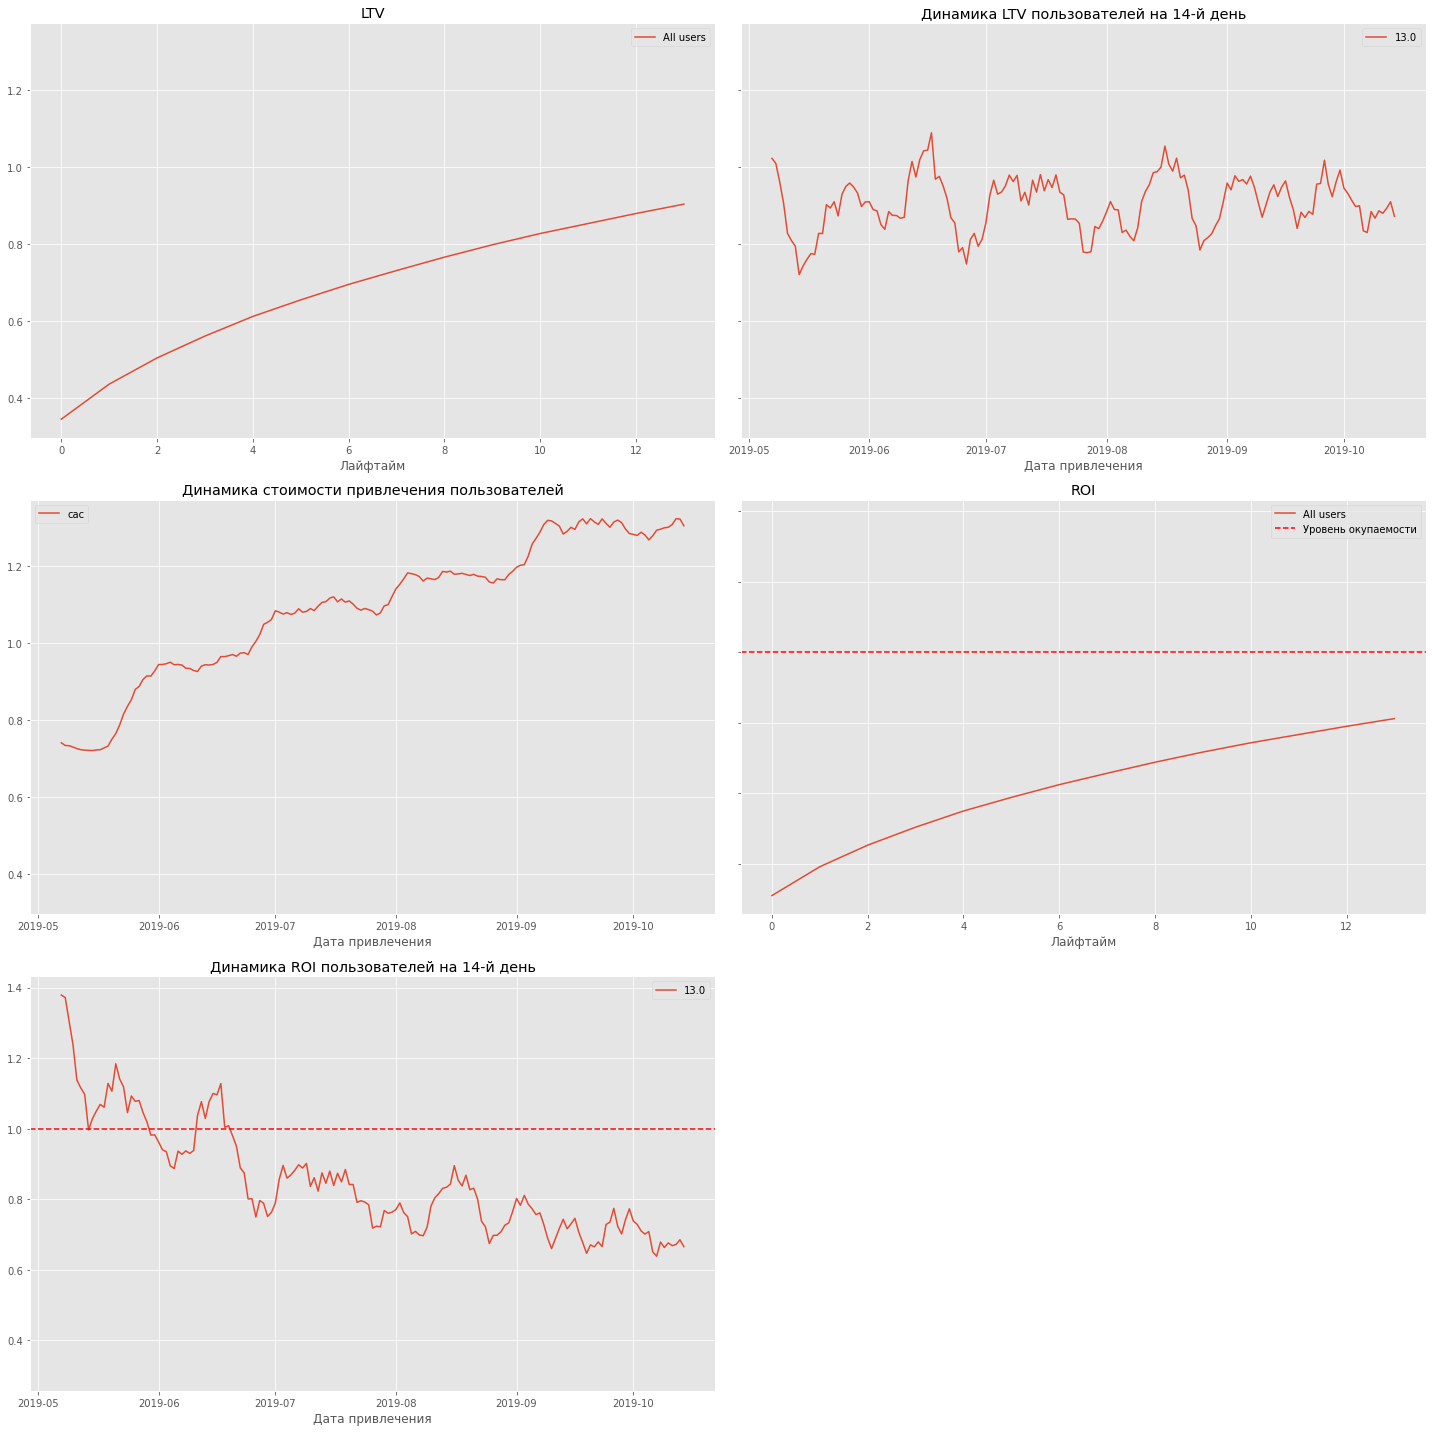

In [26]:
# Так как мы анализируем окупаемость нет необходимости включения в анализ 'органических' пользователей, 
# они достаются приложению бесплатно.

profiles = profiles.query('channel != "organic"')

# Проанализируем окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI. Функции уже были заданы ранее..
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, analysis_horizon
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, analysis_horizon)


По этим графикам можно сделать можно сделать сл. выводы:
- CAC (customer acquisition cost) увеличивается, растет количество денег которые компания тратит на привлечение одного клиента;
- ROI (Return on Investment) не дотягивает до уровня окупаемости, следовательно реклама не окупается;
- Динамика ROI показывает что уже порядка 4х месяцев привлеченные клиенты не окупаются в двух-недельном лайфтайме.


Далее посмотрим внимательнее на причины таких неутешительных результатов

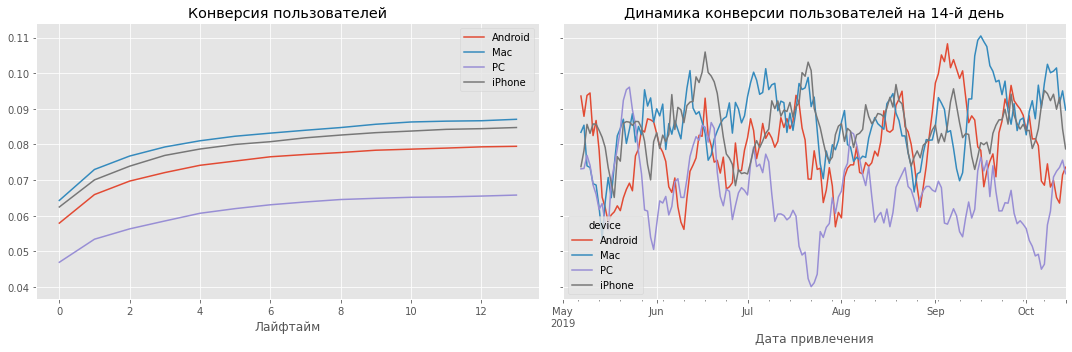

In [27]:
# Проверим конверсию пользователей и динамику её изменения. То же самое сделаем с удержанием пользователей. Построим и изучим графики конверсии и удержания.

# посмотрим конверсию с разбивкой по устройствам
dimensions = ['device']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, analysis_horizon, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, analysis_horizon)

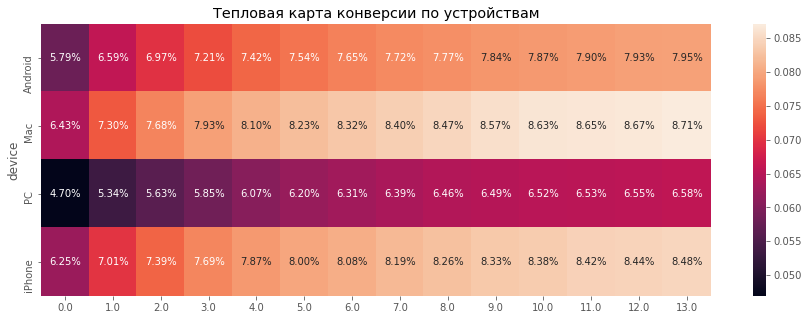

In [28]:
# строим хитмэп по таблице конверсии
plt.figure(figsize=(15, 5))
sns.heatmap(conversion_grouped.drop(columns=['cohort_size']), annot=True, fmt='.2%')
plt.title('Тепловая карта конверсии по устройствам')
plt.show() 

- Выше всего конверсия у пользователей Apple(iPhone и Mac), более 6% новых пользователей совершают покупки в день первого посещения, а к четырнадцатому дню «жизни» доля покупателей почти достигает более 8,5%.
- Пользователи PC конвертируются не столь удачно, к четырнадцатому дню «жизни» конверсия пользователей PC отстаёт от лидера более чем на 2%  
- Конверсия в платящих пользователей плавно растет на протяжении двух-недельного лайфтайма по всем устройствам

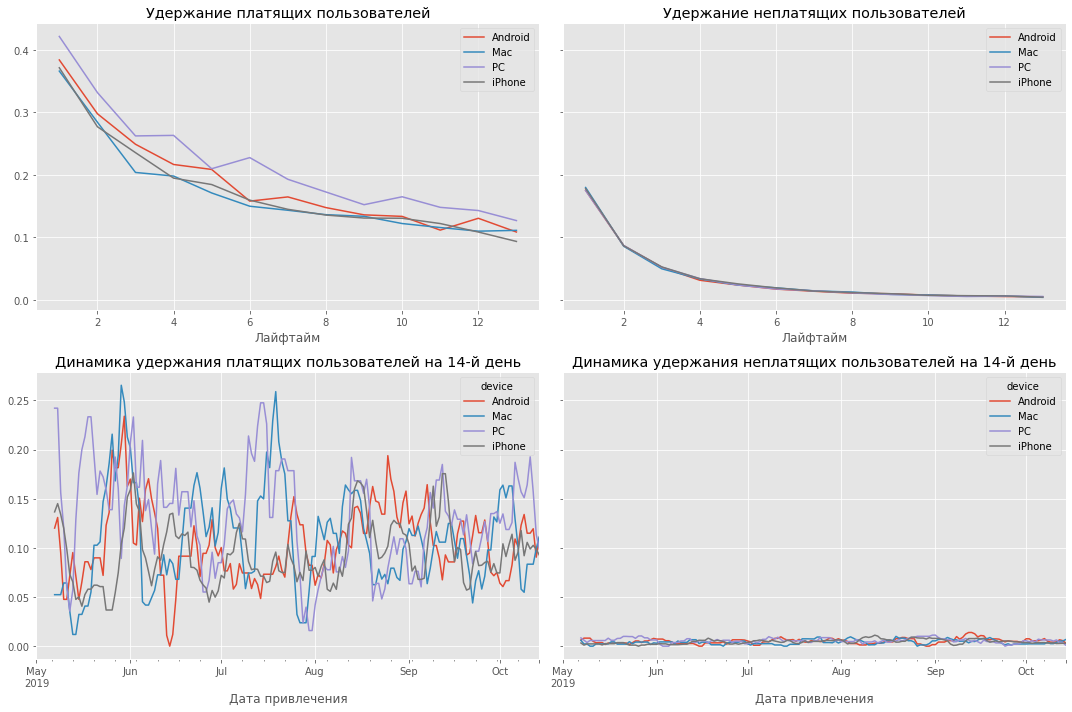

In [29]:
# посмотрим удержание пользователей с разбивкой по устройствам
dimensions = ['device']
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, analysis_horizon, dimensions=dimensions
)
plot_retention(retention_grouped, retention_history, analysis_horizon)

Удержание платящих пользователей не сильно отличается друг от друга в зависимости от устройств, чуть лучше удерживаются пользователи PC, удержание неплатящих пользователей практически одинаково для любого устройства

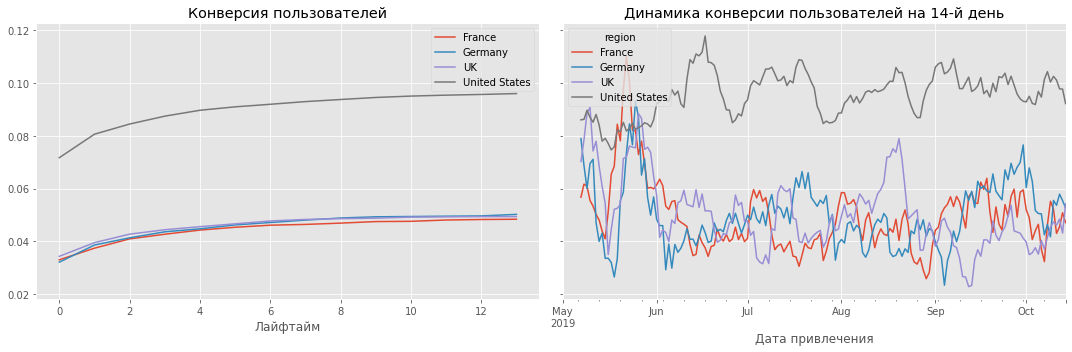

In [30]:
# посмотрим конверсию с разбивкой по странам
dimensions = ['region']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, analysis_horizon, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, analysis_horizon)

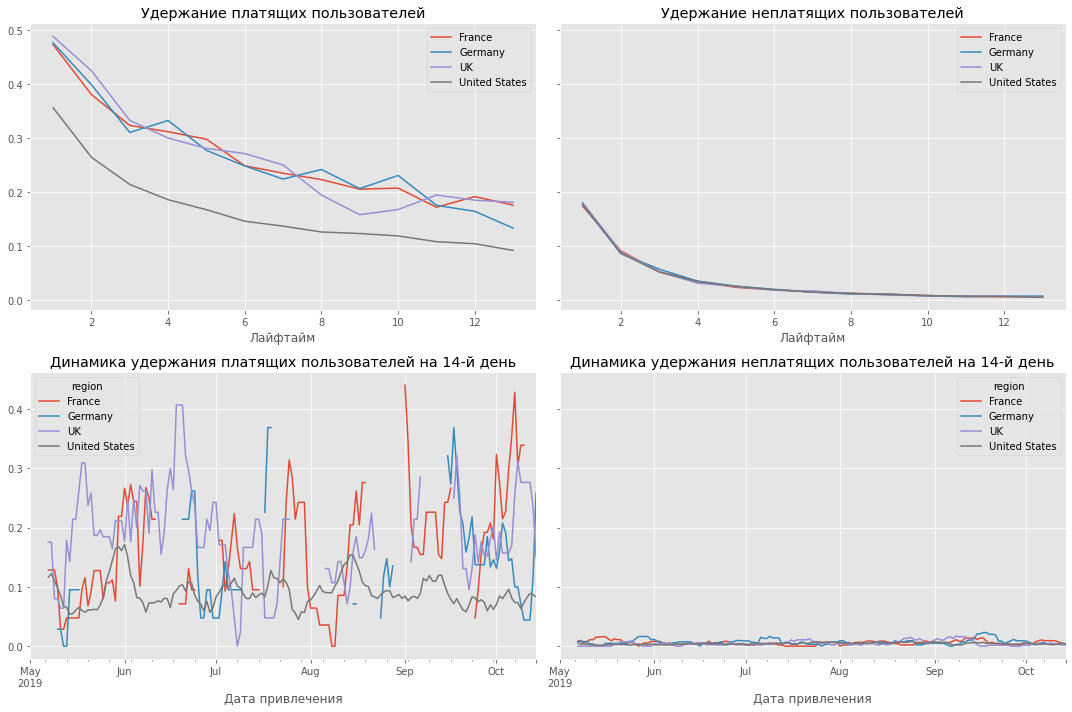

In [31]:
# посмотрим удержание с разбивкой по странам

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, analysis_horizon, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, analysis_horizon)

Конверсия пользователей в платящих лучше в США чем в Европейских странах, при этом пользователи из США хуже удерживаются

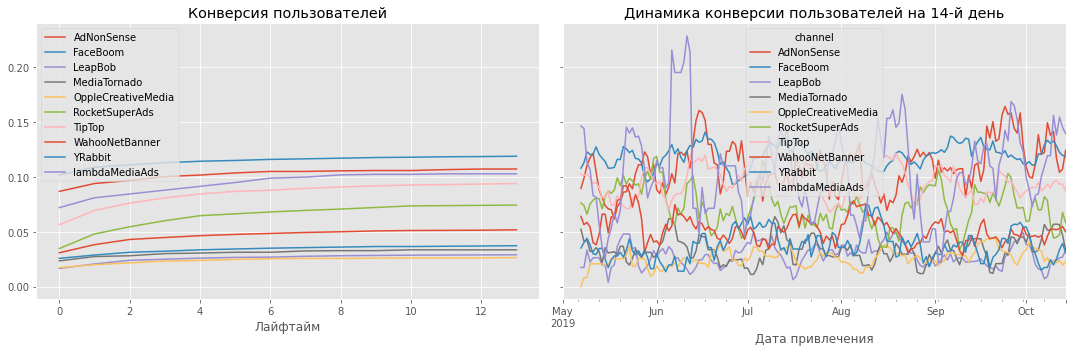

In [32]:
# посмотрим конверсию с разбивкой по каналам привлечения
dimensions = ['channel']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, analysis_horizon, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, analysis_horizon)

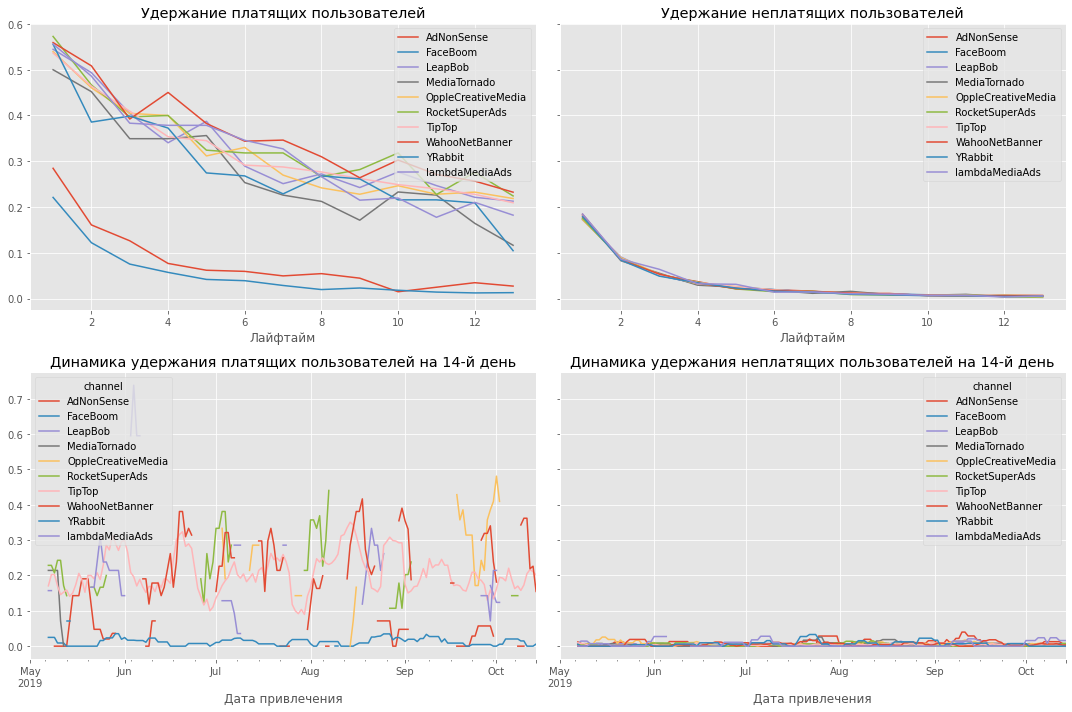

In [33]:
# посмотрим удержание с разбивкой по каналам привлечения

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, analysis_horizon, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, analysis_horizon)

Анализируя конверсию и удержание пользователей в разрезе каналов привлечения можно отметить что лучшую конверсию пользователей имеют каналы AdNonSense и FaceBoom но не торопимся радоваться т.к эти же каналы имеют самое плохое удержание платящих пользователей


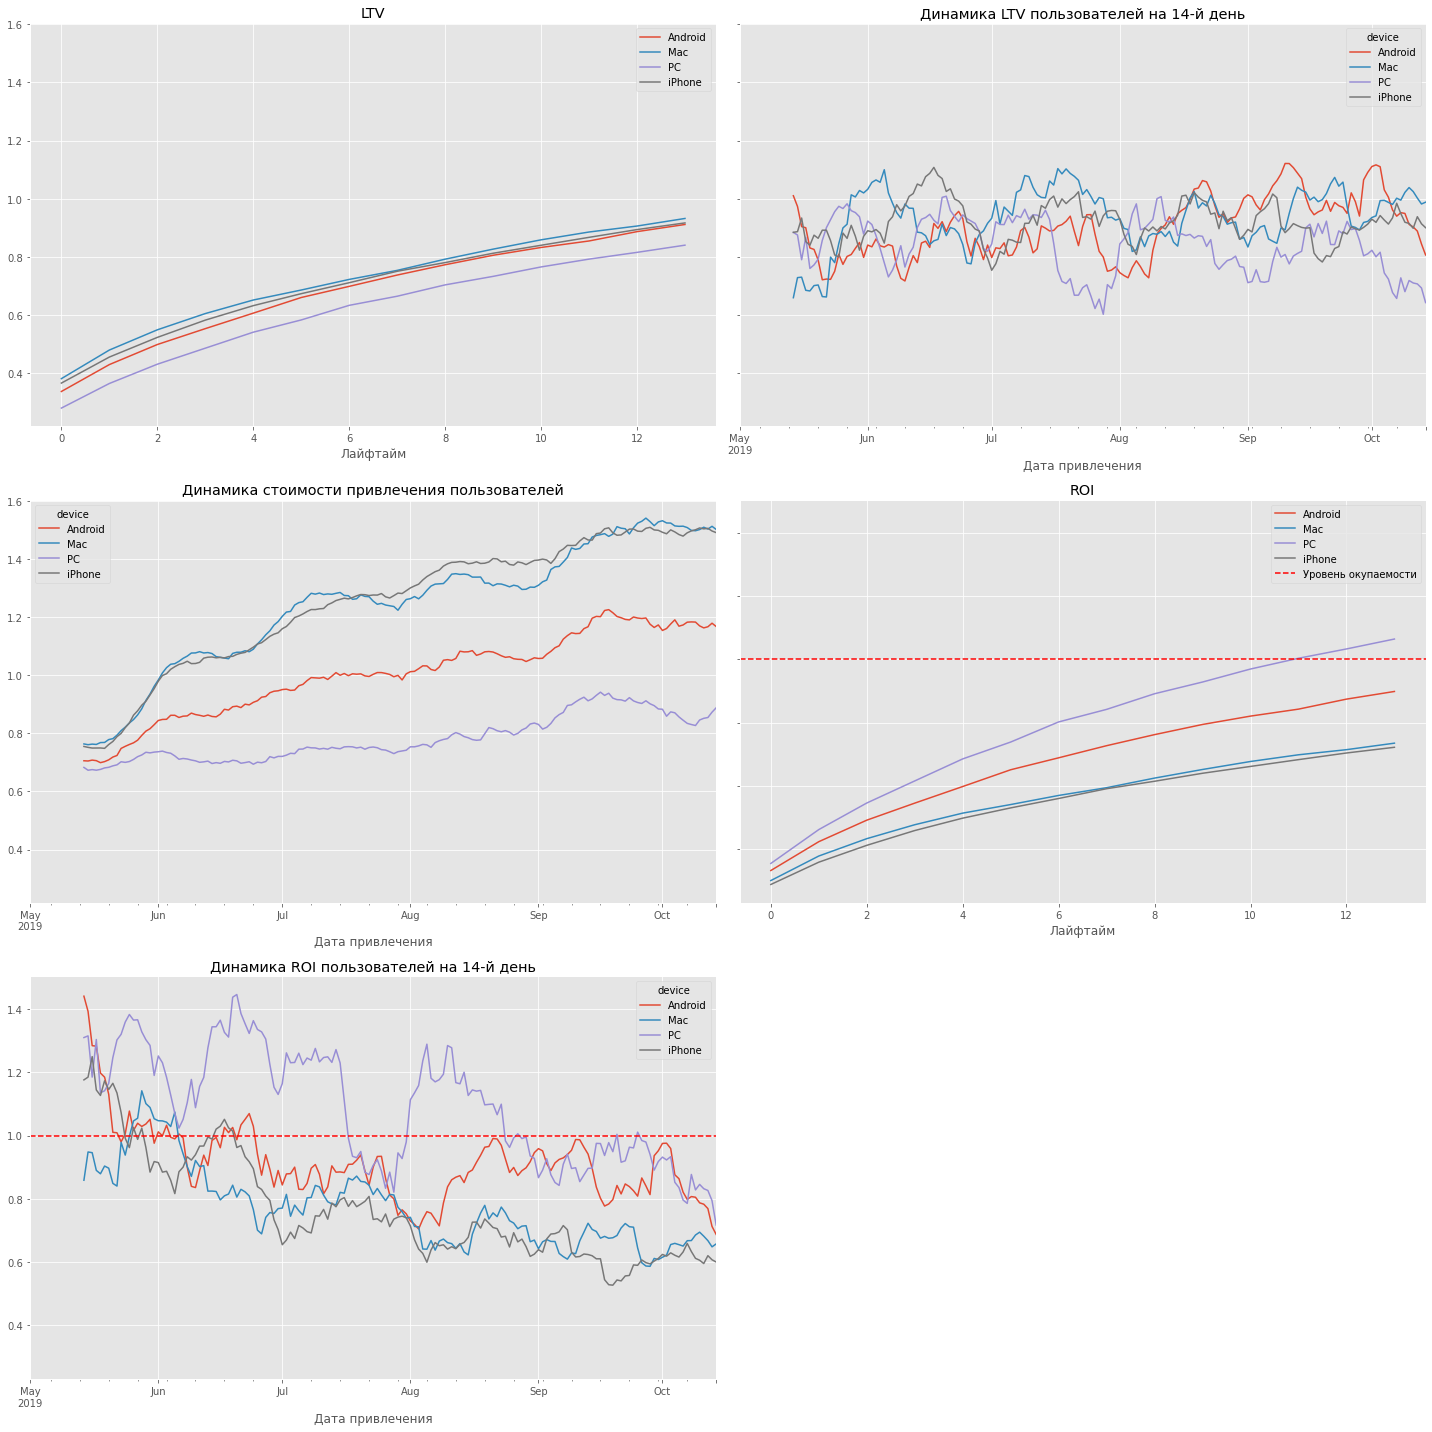

In [34]:
# Проанализируем окупаемость рекламы с разбивкой по устройствам. Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, analysis_horizon, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, analysis_horizon, window=14
)


- Пользователи PC имеют хорошую стоимости динамику привлечения пользователей и как следствие окупаются к 11 дню двухнедельного лайфтайма
- Пользователи продукции Apple(iPhone и Mac) имеют растущую динамику стоимости привлечения и как следствие не окупаются, так же до уровня окупаемости не дотягивают пользователи Android

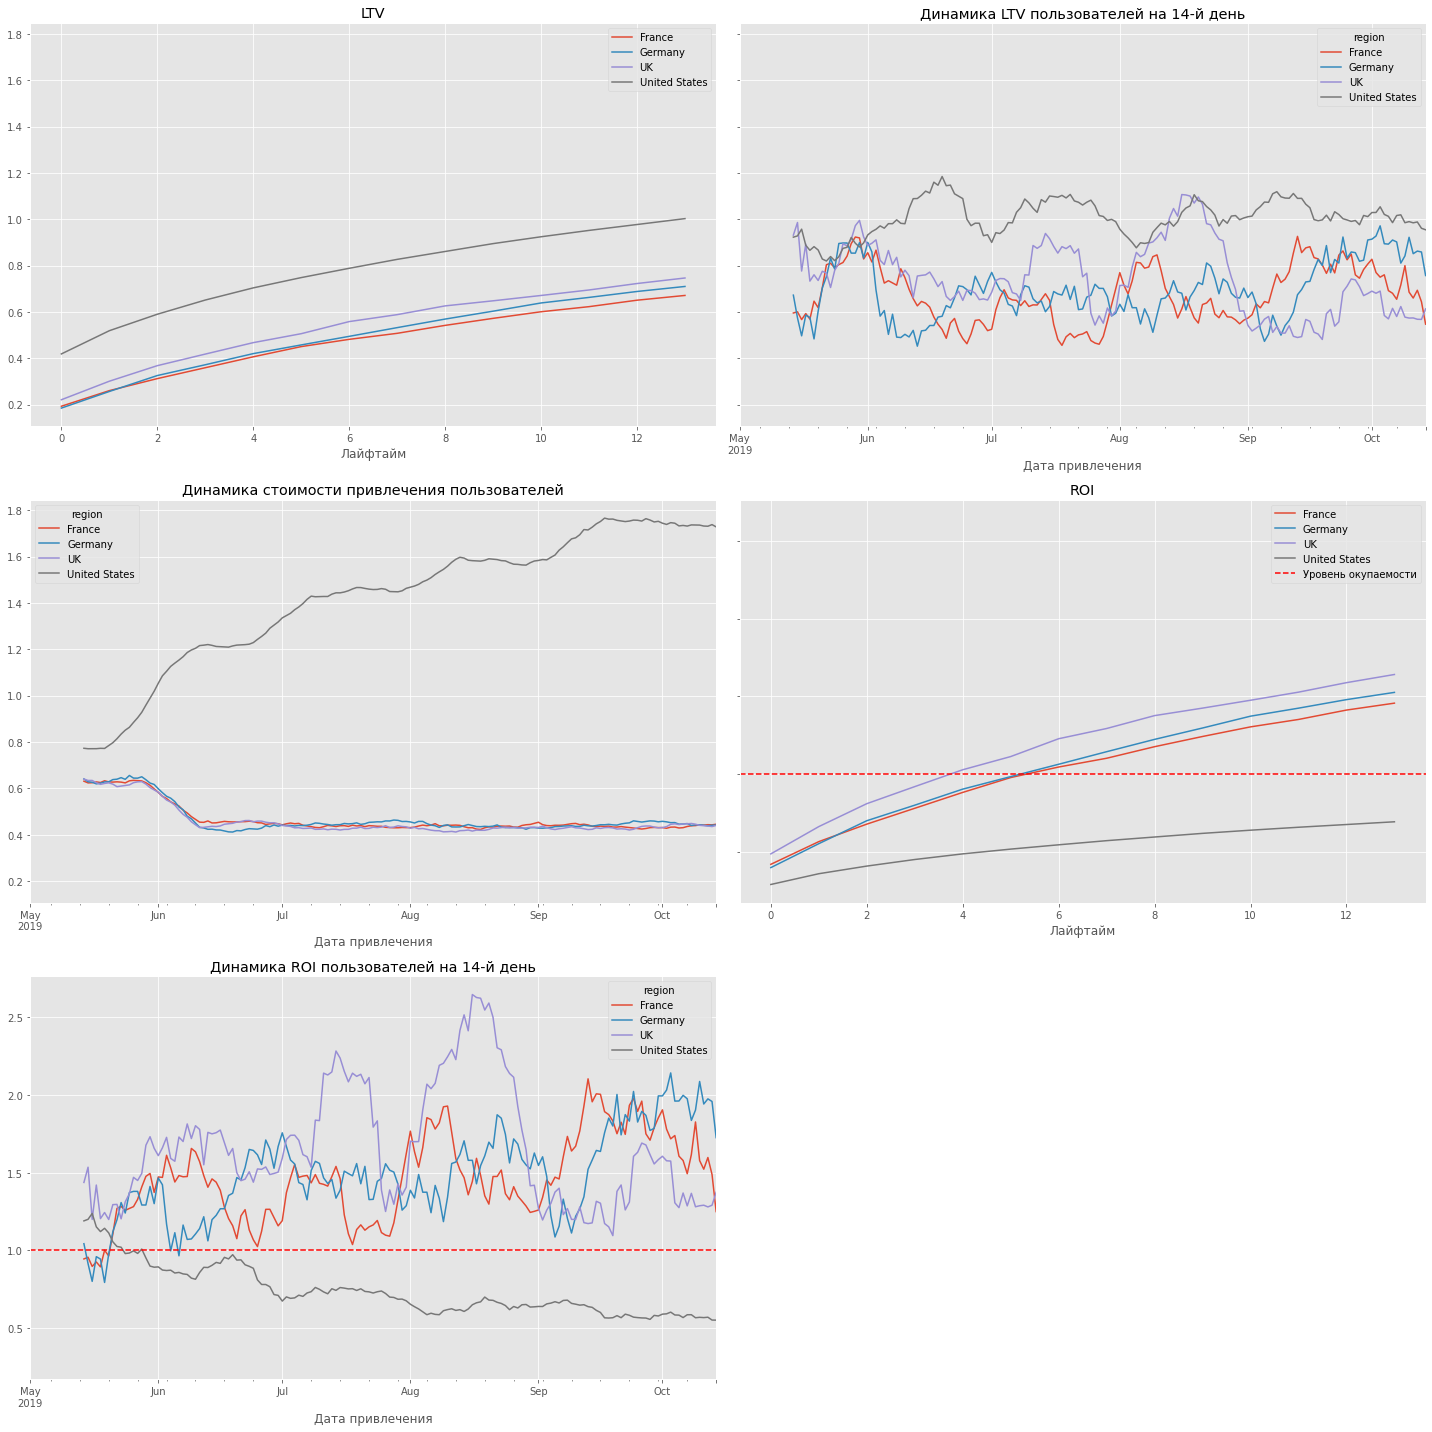

In [35]:
# Проанализируем окупаемость рекламы с разбивкой по странам. Построем графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, analysis_horizon, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, analysis_horizon, window=14
)


- Стоимость привлечения новых пользователей из США неуклонно растет при этом ROI по этим пользователям не дотягивает до уровня окупаемости( не удивительно с такими то затратами на привлечение)
- При этом пользователи из Европейских окупаются и имеют стабильно неизменную стоимость привлечения

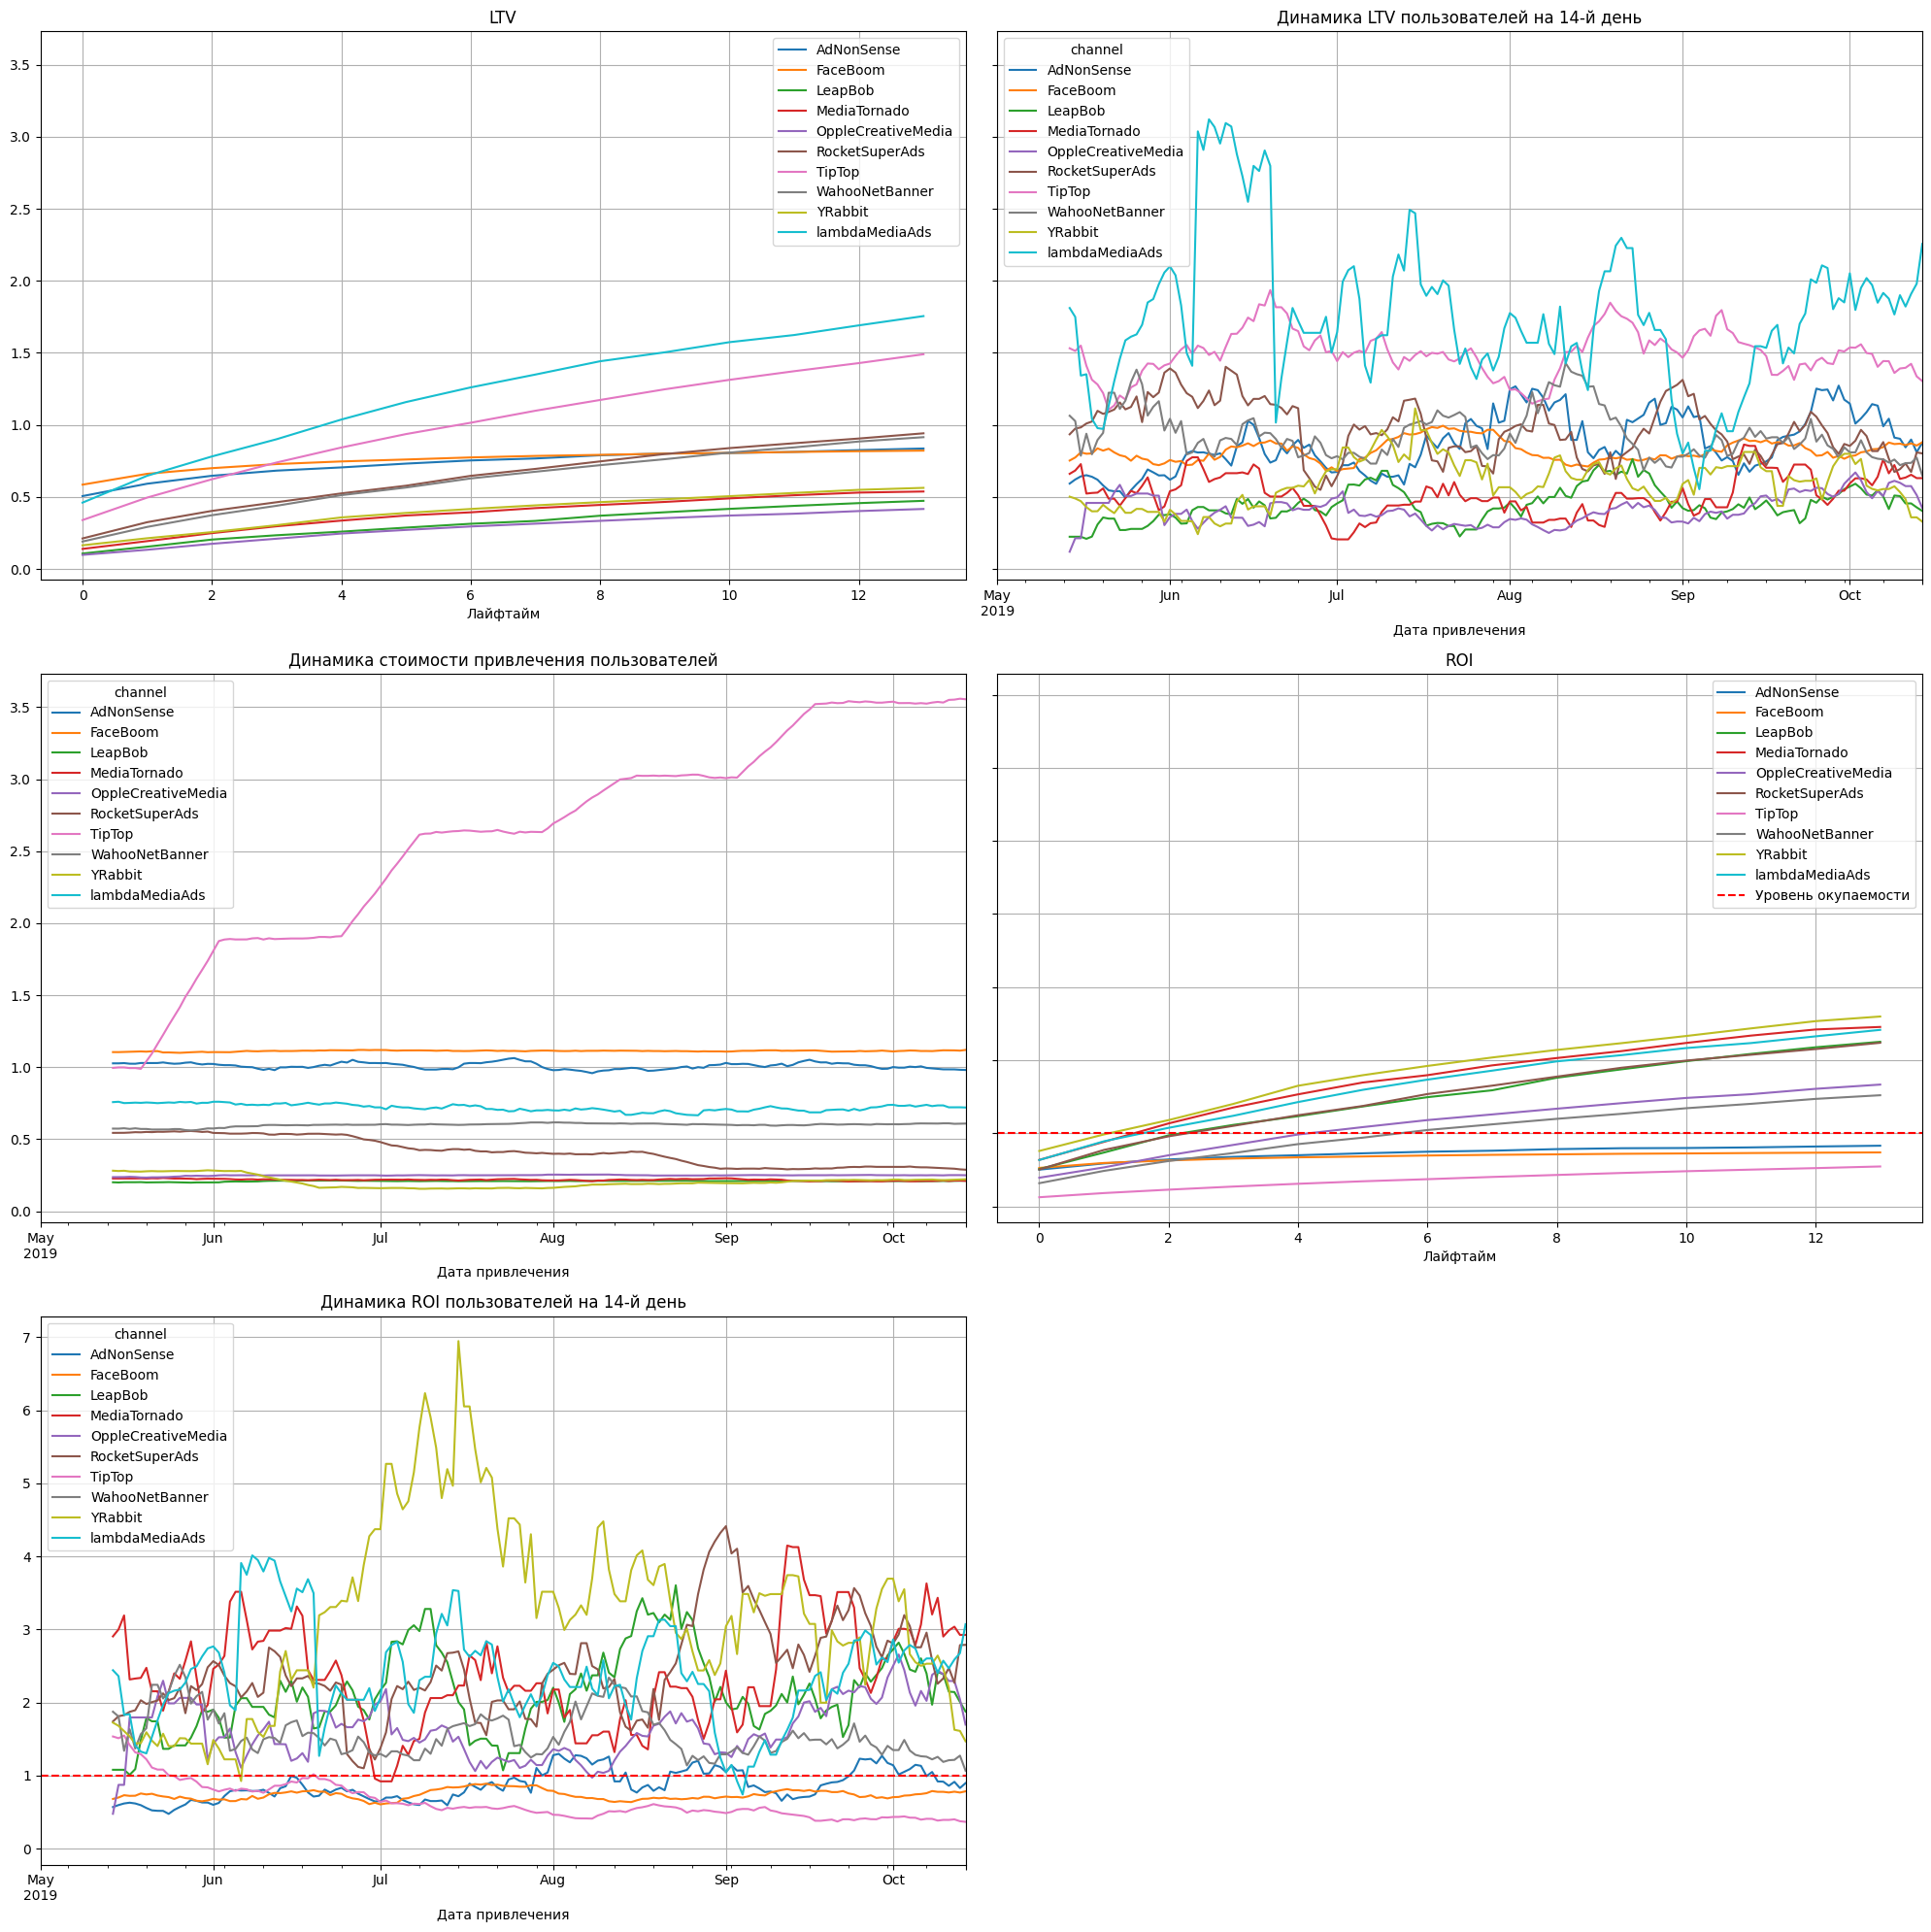

In [36]:
# Проанализируем окупаемость рекламы с разбивкой по рекламным каналам. Постройтеем графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

plt.style.use('default')
dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, analysis_horizon, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, analysis_horizon, window=14
)

- К сожалению  на двухнедельном лайфтайме каналы привлечения FaceBoom и TipTop совсем не окупаются, при этом на по каналу TipTop продолжают увеличивать рекламный бюджет, ранее мы выяснили что пользователи этих каналов имеют достаточно неплохую конверсию пользователей в платящих и существенное количество пользователей приложения приходят через эти каналы, но затраты на рекламу слишком велики..
- Так же при хорошей конверсии пользователей канала AdNonSense этот канал привлечения так же не окупается  
- С хорошей стороны показывают себя каналы lambdaMediaAds(самый большой LTV, хорошая конверсия в платящих), Yrabbit, MediaTornado            


 Общие промежуточные выводы:
- Реклама, направленная на привлечение пользователей не окупается
- Самые большие платные каналы привлечения FaceBoom и Tiptop являются и самыми проблемными и не окупают сами себя
- Так же выяснили что зачастую не окупают себя пользователи продукции Apple а так же пользователи живущие в США. Скорее всего это связано с тем, что данные в США как раз и представлены каналы привлечения FaceBoom и Tiptop. Это можно легко проверить с помощью сводной таблицы:



In [38]:
(profiles.query('channel == ["TipTop","FaceBoom"]')
 .pivot_table(
    index=['channel','region','device'],
    values='user_id',
    aggfunc='count').reset_index()
)

,channel,region,device,user_id
0,FaceBoom,United States,Android,5875
1,FaceBoom,United States,Mac,7265
2,FaceBoom,United States,PC,3008
3,FaceBoom,United States,iPhone,12996
4,TipTop,United States,Android,3889
5,TipTop,United States,Mac,4820
6,TipTop,United States,PC,2012
7,TipTop,United States,iPhone,8840


Действительно наша догадка подтвердилась - явно прослеживается взаимосвязь Канал привлечения/Страна/Девайс, т.е не окупающие себя каналы привлечения с большим количеством пользователей представлены только в США, соответственно в США более всего пользуются продукцией Apple, отсюда такие результаты по странам и девайсам
- Считаю что главная проблема окупаемости слишком высокие затраты на рекламу на неэффективныx каналах FaceBoom и TipTop, у второго еще и неоправданно высокий рост САС


<div style="padding:0px 40px 30px; 
            color:#201E20;
            font-size:110%;
            display:fill;
            border-radius:20px;
            border: 5px double;
            border-color:#201E20;
            background-color: #F6E7D8;
            overflow:hidden;
            font-weight:450;"> 
<h1 style = "text-align:center;font-size:30px;">Общий вывод.</h1>  
<br>


Как было выявлено ранее, отдел маркетинга слишком сильно вкладывается в американский рынок, привлекая пользователей через каналы привлечения TipTop и FaceBoom, что является причиной финансовых проблем приложения. Так же есть проблемы с окупаемостью канала AdNonSence. К тому же платящие пользователи FaceBoom и AdNonSence очень плохо удерживаются. По непонятным причинам отдел маркетинга продолжает увеличивать рекламный бюджет на канал привлечения TipTop.

Как маркетинговый аналитик развлекательного приложения Procrastinate Pro+ я бы рекомендовал следущие действия:

 - Поскольку основной рынок приложения это США, нужно найти причину низкого качества пользователей с канала FaceBoom, и попробовать повысить их удержание (удержание существенно хуже чем с других каналов, возможно стоит проверить весь жизенный цикл пользователей с данного канала, поискать возможные баги) Если удастся исправить ситуацию канал вполне может себя окупить.. 
 
 - Найти причину постоянно растущего CAC по каналу TipTop и устранить ее, либо сделать выбор в пользу другого канала привлечения из США (к примеру RocketSuperAds довольно низкий САС, неплохое привлечение и удержание)
 
 - Стоит обратить внимание и на другие потенциално интересные каналы привлечения например lambdaMediaAds(самый большой LTV, хорошая конверсия в платящих). 
 
 Считаю что следуя этим рекомендациям можно снизить вложения в рекламу и наконец то выйти на прибыль. 








</div>

